In [8]:
import pickle 

objects = []
file_name = "registros_tiempos2023-03-21.pkl"

with (open(file_name, "rb")) as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break
objects=objects[0]

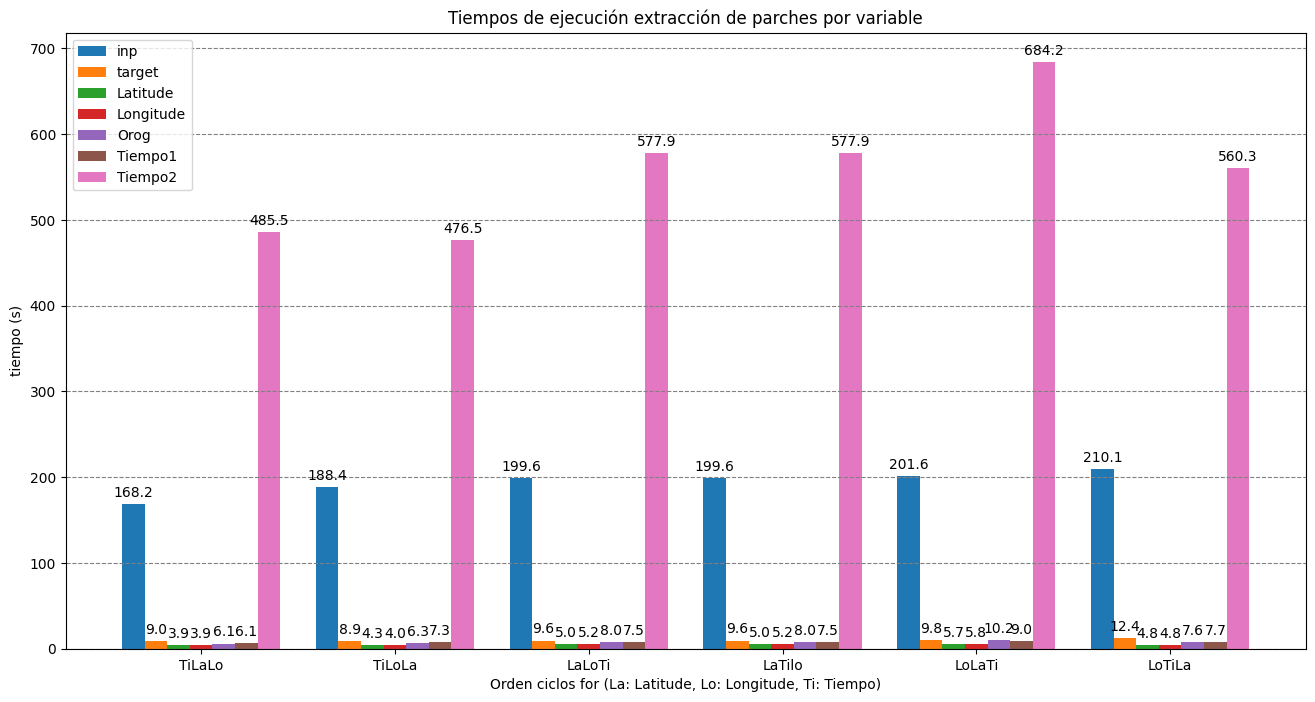

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format("{:.1f}".format(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



data = pd.DataFrame({'inp' : [ objects[x]['inp'] for x in objects.keys()   ],
                     'target': [ objects[x]['target'] for x in objects.keys()   ],
                     'Latitude': [ objects[x]['Latitude'] for x in objects.keys()   ],
                     'Longitude': [ objects[x]['Longitude'] for x in objects.keys()   ],
                     'orog': [ objects[x]['orog'] for x in objects.keys()   ],
                     'tiempo1': [ objects[x]['tiempo1'] for x in objects.keys()   ],
                     'tiempo2': [ objects[x]['tiempo2'] for x in objects.keys()   ]},
                    index=list(objects.keys()))
n = len(data.index)
x = np.arange(n)
width = 0.35
bar1=plt.bar(x - width, data.inp, width=width/3, label='inp')
bar2=plt.bar(x - (2/3)*width, data.target, width=width/3, label='target')
bar3=plt.bar(x - (1/3)*width, data.Latitude, width=width/3, label='Latitude')
bar4=plt.bar(x , data.Longitude, width=width/3, label='Longitude')
bar5=plt.bar(x + (1/3)*width, data.orog, width=width/3, label='Orog')
bar6=plt.bar(x + (2/3)*width, data.tiempo1, width=width/3, label='Tiempo1')
bar7=plt.bar(x + (3/3)*width, data.tiempo2, width=width/3, label='Tiempo2')

plt.xlabel('Orden ciclos for (La: Latitude, Lo: Longitude, Ti: Tiempo)')
plt.ylabel('tiempo (s)')
plt.title('Tiempos de ejecución extracción de parches por variable')

plt.xticks(x, data.index)
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (16,8)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)
autolabel(bar7)


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

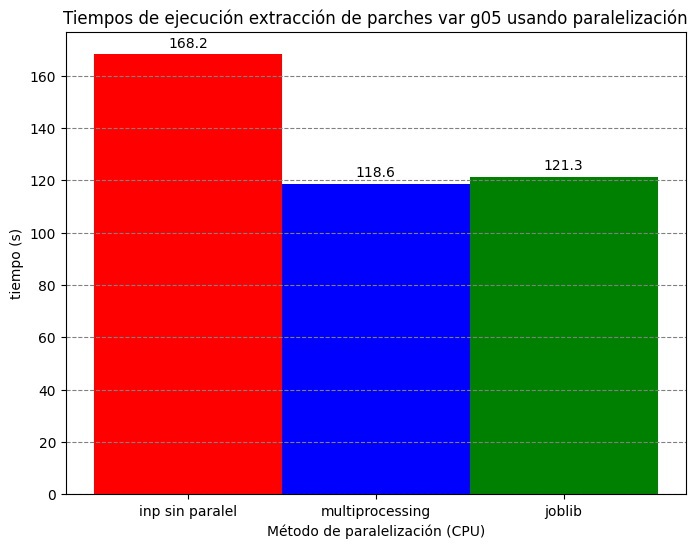

In [134]:
import numpy as np

time_multiprocessing= open("times_multiprocessing.txt")
time_joblib=open("times_joblib.txt")
time_multiprocessing=float(time_multiprocessing.read())
time_joblib=float(time_joblib.read())

data = pd.DataFrame({'inp' : objects['TiLaLo']['inp']   ,
                     'multi': time_multiprocessing  ,
                     'joblib': time_joblib},
                    index=['inp', 'multi','joblib'])

width=0.2
bar1=plt.bar( ['inp sin paralel', 'multiprocessing', 'joblib'], data.T['inp'].values, width=1, align='center', color=['red','blue','green'])

plt.xlabel('Método de paralelización (CPU)')
plt.ylabel('tiempo (s)')
plt.title('Tiempos de ejecución extracción de parches var g05 usando paralelización')

plt.rcParams["figure.figsize"] = (8,6)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

autolabel(bar1)

plt.show